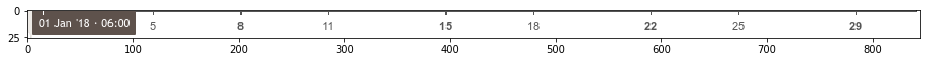

In [2]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,16)
img = cv2.imread('6_O15974.8677H15989.5864L15971.8203C15971.8203−3.0474.png')

plt.imshow(img)
plt.show()

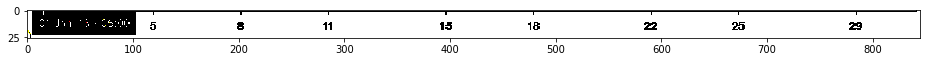

In [3]:
(_, t) = cv2.threshold(img, 230,255, cv2.THRESH_BINARY)
plt.imshow(t)
plt.show()

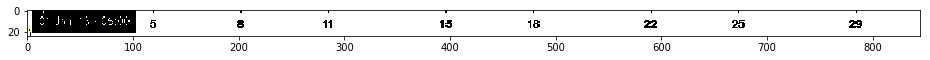

In [4]:
(_, t) = cv2.threshold(img[2:,:], 230,255, cv2.THRESH_BINARY)
plt.imshow(t)
plt.show()

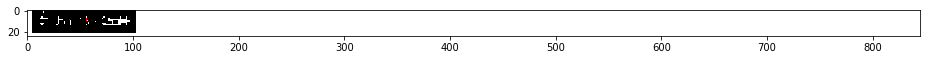

In [5]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,3))
f= cv2.morphologyEx(t,cv2.MORPH_CLOSE,kernel)
plt.imshow(f)
plt.show()

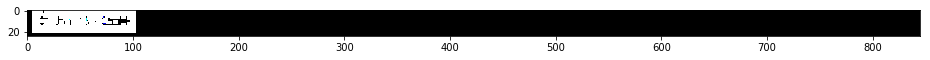

In [6]:
(_, q) = cv2.threshold(f, 0,255, cv2.THRESH_BINARY_INV)
plt.imshow(q)
plt.show()

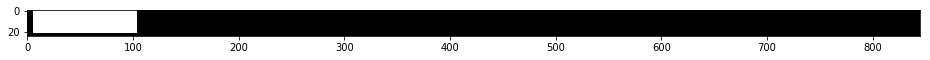

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(8,5))
s= cv2.morphologyEx(q,cv2.MORPH_CLOSE,kernel)
plt.imshow(s)
plt.show()

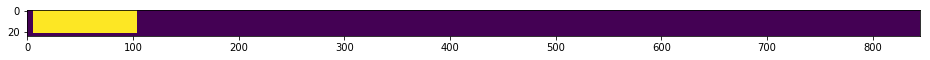

In [8]:
g = cv2.cvtColor(s, cv2.COLOR_BGR2GRAY)
plt.imshow(g)
plt.show()

6 0 98 21


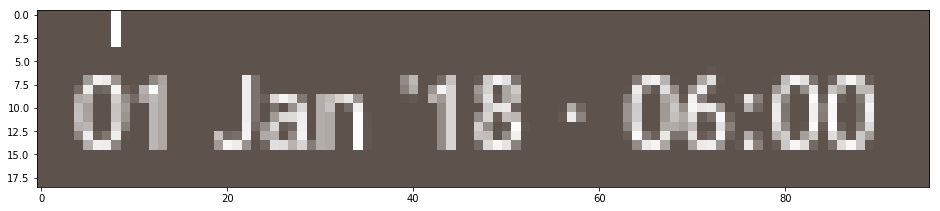

In [9]:
(_,contours,_) = cv2.findContours(g, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
(x,y,w,h) = cv2.boundingRect(contours[0])
print(x,y,w,h)
m = img[y+1:y+h-1,x+1:x+w-1]
plt.imshow(m)
plt.show()

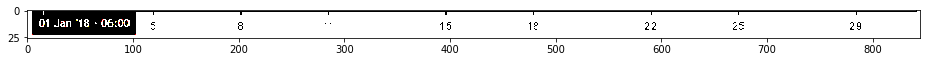

In [10]:
(_, thresh) = cv2.threshold(img, 125,255, cv2.THRESH_BINARY)
plt.imshow(thresh)
plt.show()

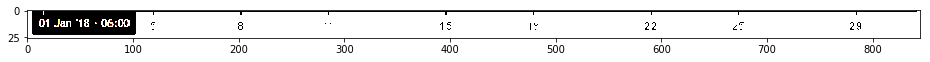

In [11]:
(_, thresh) = cv2.threshold(img, 110,255, cv2.THRESH_BINARY)
plt.imshow(thresh)
plt.show()

399 0 98 21


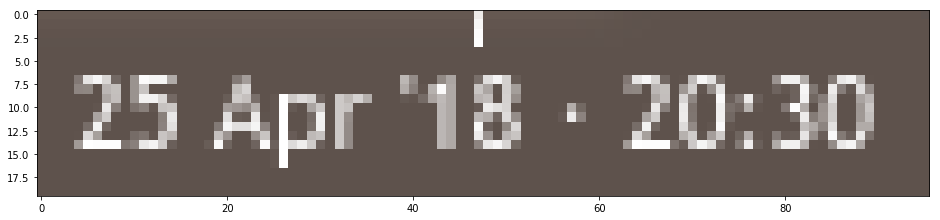

In [14]:
img = cv2.imread('438_O34373.8752H34576.7896L34353.2213C34576.7896+202.9144.png')
(_, t) = cv2.threshold(img[2:,:], 230,255, cv2.THRESH_BINARY)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,3))
f= cv2.morphologyEx(t,cv2.MORPH_CLOSE,kernel)
(_, q) = cv2.threshold(f, 0,255, cv2.THRESH_BINARY_INV)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(8,5))
s= cv2.morphologyEx(q,cv2.MORPH_CLOSE,kernel)
g = cv2.cvtColor(s, cv2.COLOR_BGR2GRAY)
(_,contours,_) = cv2.findContours(g, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    (x,y,w,h) = cv2.boundingRect(contour)
    if(w<150 and w>80 and h>15 ):
        print(x,y,w,h)
        m = img[y+1:y+h,x+1:x+w-1]
        plt.imshow(m)
        plt.show()

In [35]:
import cv2
import os
def find_rectangle(file_path,save_path):
    file_path = str(file_path)
    save_path = str(save_path)
    img = cv2.imread(file_path)
    (_, t) = cv2.threshold(img[2:,:], 230,255, cv2.THRESH_BINARY)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,3))
    f= cv2.morphologyEx(t,cv2.MORPH_CLOSE,kernel)
    (_, q) = cv2.threshold(f, 0,255, cv2.THRESH_BINARY_INV)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(8,5))
    s= cv2.morphologyEx(q,cv2.MORPH_CLOSE,kernel)
    g = cv2.cvtColor(s, cv2.COLOR_BGR2GRAY)
    (_,contours,_) = cv2.findContours(g, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if_fail = True
    for contour in contours:
        (x,y,w,h) = cv2.boundingRect(contour)
        if(w<150 and w>80 and h>15 ):
            m = img[y+1:y+h,x+1:x+w-1]
            cv2.imwrite( save_path, m);
            if_fail = False
    if(if_fail):
        print('!!! fail in '+file_path)
        cv2.imwrite( save_path, cv2.imread(file_path));
def multi_processing(source_folder,target_folder):
    source_target_dirs = [[os.path.join(source_folder, f),os.path.join(target_folder, f)]
                          for f in os.listdir(source_folder) 
                          if os.path.isdir(os.path.join(source_folder, f))]
    if (os.path.exists(target_folder) and os.path.isdir(target_folder)):
        for d in source_target_dirs:
            if not os.path.exists(d[1]):
                os.makedirs(d[1])
            source_targert_files = [[os.path.join(d[0], f),os.path.join(d[1], f)] 
                                    for f in os.listdir(d[0])
                                    if os.path.isfile(os.path.join(d[0], f))]
            for f in source_targert_files:
                find_rectangle(f[0],f[1])
multi_processing('/home/liu/Desktop/nodejs/images/BCHLONG','/home/liu/Desktop/nodejs/images/BCHLONG_target')
multi_processing('/home/liu/Desktop/nodejs/images/BTCSHORT','/home/liu/Desktop/nodejs/images/BTCSHORT_target')

!!! fail in /home/liu/Desktop/nodejs/images/BTCSHORT/Day/159_O19344.7154H20384.9157L19117.9449C20217.9847+873.2692.png
!!! fail in /home/liu/Desktop/nodejs/images/BTCSHORT/Day/197_O21808.8263H22189.9031L21436.9120C21583.7558−225.0705.png
!!! fail in /home/liu/Desktop/nodejs/images/BTCSHORT/Day/156_O20408.6638H20900.5799L20397.2322C20624.3399+215.6761.png
!!! fail in /home/liu/Desktop/nodejs/images/BTCSHORT/Day/98_O21998.9584H27414.9497L21955.6290C27074.2285+5075.2701.png
!!! fail in /home/liu/Desktop/nodejs/images/BTCSHORT/Day/207_O22444.4919H22681.3838L21488.8231C22018.2121−426.2798.png
!!! fail in /home/liu/Desktop/nodejs/images/BTCSHORT/Day/231_O32788.4969H36576.2402L32583.8694C34132.8640+1344.3671.png
!!! fail in /home/liu/Desktop/nodejs/images/BTCSHORT/Day/186_O28768.7576H29525.2690L27347.2523C27361.0508−1407.7068.png
!!! fail in /home/liu/Desktop/nodejs/images/BTCSHORT/Day/80_O17731.2054H19395.6760L17325.7097C19085.7818+1354.5764.png
!!! fail in /home/liu/Desktop/nodejs/images/BT

In [37]:
import cv2
import os
def find_rectangle(file_path,save_path,fail_path):
    file_path = str(file_path)
    save_path = str(save_path)
    img = cv2.imread(file_path)
    (_, t) = cv2.threshold(img[2:,:], 230,255, cv2.THRESH_BINARY)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,3))
    f= cv2.morphologyEx(t,cv2.MORPH_CLOSE,kernel)
    (_, q) = cv2.threshold(f, 0,255, cv2.THRESH_BINARY_INV)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(8,5))
    s= cv2.morphologyEx(q,cv2.MORPH_CLOSE,kernel)
    g = cv2.cvtColor(s, cv2.COLOR_BGR2GRAY)
    (_,contours,_) = cv2.findContours(g, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if_fail = True
    for contour in contours:
        (x,y,w,h) = cv2.boundingRect(contour)
        if(w<150 and w>80 and h>15 ):
            m = img[y+1:y+h,x+1:x+w-1]
            cv2.imwrite( save_path, m);
            if_fail = False
    if(if_fail):
        print('!!! fail in '+file_path)
        cv2.imwrite( fail_path, cv2.imread(file_path));
def multi_processing(source_folder,target_folder,fail_folder):
    source_target_dirs = [[os.path.join(source_folder, f),
                           os.path.join(target_folder, f),
                           os.path.join(fail_folder, f)]
                          for f in os.listdir(source_folder) 
                          if os.path.isdir(os.path.join(source_folder, f))]
    if (os.path.exists(target_folder) and os.path.isdir(target_folder) and 
        os.path.exists(fail_folder) and os.path.isdir(fail_folder)):
        for d in source_target_dirs:
            if not os.path.exists(d[1]):
                os.makedirs(d[1])
            if not os.path.exists(d[2]):
                os.makedirs(d[2])
            source_targert_files = [[os.path.join(d[0], f),os.path.join(d[1], f),os.path.join(d[2], f)] 
                                    for f in os.listdir(d[0])
                                    if os.path.isfile(os.path.join(d[0], f))]
            for f in source_targert_files:
                find_rectangle(f[0],f[1],f[2])
multi_processing('/home/liu/Desktop/nodejs/images/BTCSHORT',
                 '/home/liu/Desktop/nodejs/images/BTCSHORT_target',
                 '/home/liu/Desktop/nodejs/images/BTCSHORT_fail')

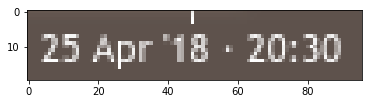

PLE eee)


In [2]:
import cv2
import os
from PIL import Image
import pytesseract
img = cv2.imread('test.png')
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()
code = pytesseract.image_to_string(img)
print(code)

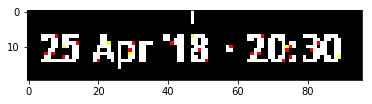

In [16]:
(_, thresh) = cv2.threshold(img, 110,255, cv2.THRESH_BINARY)
plt.imshow(thresh)
plt.show()

In [17]:
code = pytesseract.image_to_string(thresh)
print(code)

PLE ae eed


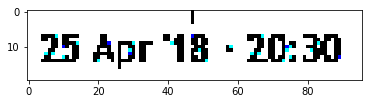

In [18]:
(_, q) = cv2.threshold(thresh, 0,255, cv2.THRESH_BINARY_INV)
plt.imshow(q)
plt.show()

In [19]:
code = pytesseract.image_to_string(q)
print(code)

25 Apr 18 = 20:30


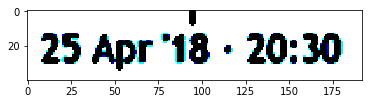

In [21]:
height,width = img.shape[:2]
img_ = cv2.resize(img,(2*width,2*height),interpolation=cv2.INTER_CUBIC)
(_, thresh) = cv2.threshold(img_, 110,255, cv2.THRESH_BINARY)
(_, q) = cv2.threshold(thresh, 0,255, cv2.THRESH_BINARY_INV)
plt.imshow(q)
plt.show()

In [22]:
code = pytesseract.image_to_string(q)
print(code)

25 Apr 18 - 20:30


In [58]:
import cv2
import os
from PIL import Image
import pytesseract
import pandas as pd
import re
def recognise_once(file_path):
    file_path = str(file_path)
    img = cv2.imread(file_path)
    height,width = img.shape[:2]
    img = cv2.resize(img,(2*width,2*height),interpolation=cv2.INTER_CUBIC)
    (_, thresh) = cv2.threshold(img, 110,255, cv2.THRESH_BINARY)
    (_, q) = cv2.threshold(thresh, 0,255, cv2.THRESH_BINARY_INV)
    code = pytesseract.image_to_string(q)
    return code
def multi_recognise(source_folder,target_name):
    df = pd.DataFrame(columns=['open','high','low','close','month','day','time'])
    source_dirs = [os.path.join(source_folder, f)
                          for f in os.listdir(source_folder) 
                          if os.path.isdir(os.path.join(source_folder, f))]
    for d in source_dirs:
        source_files = [[os.path.join(d, f),f]
                        for f in os.listdir(d)
                        if os.path.isfile(os.path.join(d, f))]
        for f in source_files:
            code = recognise_once(f[0])
            mystring=f[1].split('_')[1]
            o = mystring[ mystring.find("O")+1 : mystring.find("H") ]
            h = mystring[ mystring.find("H")+1 : mystring.find("L") ]
            l = mystring[ mystring.find("L")+1 : mystring.find("C") ]
            if(mystring.find("+")!=-1):
                c = mystring[ mystring.find("C")+1 : mystring.find("+") ]
            else:
                c = mystring[ mystring.find("C")+1 : mystring.find("−") ]
            try:
                t = re.search(r'\d{2}:\d{2}', code).group()
                d = re.search(r'\d{2}(.*)[A-Za-z]{3}', code).group()
                df = df.append({'open':o, 'high':h, 'low':l, 'close':c, 'month':d[-3:], 'day':d[:2], 'time':t}, ignore_index=True)
            except:
                print(f[0])
    df = df.sort_values(['month', 'day','time'])
    df.to_csv(target_name,index=False)
    
multi_recognise('/home/liu/Desktop/nodejs/images/BCHLONG_target','BCHLONG.csv')
multi_recognise('/home/liu/Desktop/nodejs/images/BTCSHORT_target','BTCSHORT.csv')

In [62]:
import pandas as pd
df =pd.read_csv('BCHLONG.csv')
print(df)

            open        high         low       close month  day   time
0     19592.1012  19769.5180  19564.3889  19769.5180   Apr    1  00:00
1     19476.4386  19476.4386  19402.5186  19417.1511   Apr    1  01:00
2     19422.0274  19422.0274  19390.0762  19390.0762   Apr    1  01:30
3     19341.5458  19352.1859  19341.5458  19345.1725   Apr    1  02:30
4     19341.1082  19345.0681  19336.4753  19338.7123   Apr    1  03:30
5     19324.0533  19324.0533  19316.0610  19316.8684   Apr    1  04:30
6     19315.1628  19315.1628  19244.0501  19244.0501   Apr    1  05:00
7     19213.3759  19213.3759  19121.4093  19121.4093   Apr    1  06:00
8     19124.0315  19124.0315  19101.8641  19101.8641   Apr    1  07:00
9     19099.6752  19164.8991  19099.6752  19164.8991   Apr    1  08:00
10    19182.3213  19576.6291  19158.7517  19576.6291   Apr    1  08:30
11    19626.8323  19628.4315  19598.9452  19601.9451   Apr    1  09:30
12    19492.2583  19543.0285  19467.5380  19506.3510   Apr    1  10:30
13    

In [63]:
g = df.groupby(['month'])
print(len(g))

10


In [64]:
g.size()

month
Apr    853
Aug    908
Feb    798
Jan    874
Jul    911
Jun    854
Mar    913
May    908
Oct    776
Sep    854
dtype: int64

In [1]:
import pandas as pd
df =pd.read_csv('BTCSHORT.csv')
print(df)

            open        high         low       close month  day   time   m  \
0     14183.0007  14203.4700  14081.6583  14081.6583   Jan    1  01:30   1   
1     14049.5826  14049.5826  14024.4600  14035.5169   Jan    1  02:30   1   
2     14019.7569  14020.5344  13996.0320  13997.0302   Jan    1  03:30   1   
3     13961.0640  13962.1366  13948.6883  13949.7250   Jan    1  04:30   1   
4     13943.7586  13952.4772  13933.8394  13952.1489   Jan    1  05:00   1   
5     13953.8174  13956.3239  13893.2196  13893.2196   Jan    1  06:00   1   
6     13875.4102  13928.8829  13859.3407  13928.8829   Jan    1  07:00   1   
7     13962.7118  13962.7118  13887.6463  13894.3795   Jan    1  08:00   1   
8     13898.4779  13900.9737  13847.2390  13847.2390   Jan    1  08:30   1   
9     13836.8747  13952.2641  13835.8766  13952.2495   Jan    1  09:30   1   
10    13962.1724  14010.5663  13960.6313  14006.8970   Jan    1  10:30   1   
11    14006.3748  14241.0266  14006.3748  14202.5436   Jan    1 

In [2]:
g = df.groupby(['month'])
g.size()

month
Apr    880
Aug    883
Feb    825
Jan    883
Jul    884
Jun    887
Mar    883
May    887
Oct    689
Sep    879
dtype: int64

In [102]:
def monthToNum(shortMonth):
    return{
            'Jan' : '01',
            'Feb' : '02',
            'Mar' : '03',
            'Apr' : '04',
            'May' : '05',
            'Jun' : '06',
            'Jul' : '07',
            'Aug' : '08',
            'Sep' : '09', 
            'Oct' : '10',
            'Nov' : '11',
            'Dec' : '12'
    }[shortMonth]
import pandas as pd
df =pd.read_csv('BTCSHORT.csv')
m_list = df["month"].values
m_list = [monthToNum(m) for m in m_list]
df["m"] = m_list
df = df.sort_values(['m', 'day','time'])
d_list = df["day"].values
d_list = [str(d).zfill(2) for d in d_list]
t_list = df["time"].values
datetime_list = []
for i in range(len(df)):
    datetime_list.append('2018-'+m_list[i]+'-'+d_list[i]+' '+t_list[i])
df['datetime'] = datetime_list
df.to_csv('BTCSHORT.csv',index=False)

In [99]:
df =pd.read_csv('BCHLONG.csv')
m_list = df["month"].values
m_list = [monthToNum(m) for m in m_list]
df["m"] = m_list
df = df.sort_values(['m', 'day','time'])
d_list = df["day"].values
d_list = [str(d).zfill(2) for d in d_list]
t_list = df["time"].values
datetime_list = []
for i in range(len(df)):
    datetime_list.append('2018-'+m_list[i]+'-'+d_list[i]+' '+t_list[i])
df['datetime'] = datetime_list
df.to_csv('BCHLONG.csv',index=False)

In [30]:
def monthToNum(shortMonth):
    return{
            'Jan' : '01',
            'Feb' : '02',
            'Mar' : '03',
            'Apr' : '04',
            'May' : '05',
            'Jun' : '06',
            'Jul' : '07',
            'Aug' : '08',
            'Sep' : '09', 
            'Oct' : '10',
            'Nov' : '11',
            'Dec' : '12'
    }[shortMonth]
import pandas as pd
from datetime import datetime
import time

def from_t_to_ts(t):
    format = "%Y-%m-%d  %H:%M"
    ts = time.mktime(datetime.strptime(t, format).timetuple())
    return int(ts)

def from_ts_to_t(ts):
    return datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M')

df_l =pd.read_csv('BTCLONG.csv')
# g = df_l.groupby(['month'])
# g.size()
# g = df_l.groupby(['day'])
# g.size()
m_list = df_l["month"].values
m_list = [monthToNum(m) for m in m_list]
df_l["m"] = m_list
d_list = df_l["day"].values
d_list = [str(d).zfill(2) for d in d_list]
t_list = df_l["time"].values
datetime_list = []
for i in range(len(df_l)):
    datetime_list.append('2018-'+m_list[i]+'-'+d_list[i]+' '+t_list[i])
df_l['datetime'] = datetime_list
df_l = df_l.sort_values(['datetime'])

cc_list = df_l["close"].values
cc_list = [float(cc.split('C')[0]) for cc in cc_list]
df_l['close'] = cc_list
df_l = df_l.drop_duplicates()

t_list = df_l.datetime.values.tolist()
o_list = df_l.open.values.tolist()
c_list = df_l.close.values.tolist()
ts_list = [from_t_to_ts(t) for t in t_list]
o_list = [round(o) for o in o_list]
c_list = [round(c) for c in c_list]
cols = ['TS', 'T', 'long', 'l_c']
df = pd.DataFrame(columns=cols)
df['TS'] = ts_list
df['T'] = t_list
df['long'] = o_list
df['l_c'] = c_list
df = df.sort_values(by=['TS'])
for idx, ts in enumerate(ts_list[:-1]):
    if(ts+1800 not in ts_list):
        if(from_ts_to_t(ts+1800)<t_list[idx]):
            df = df.append({'TS':ts+1800, 'T':from_ts_to_t(ts+5400), 'long':c_list[idx], 'l_c':0}, ignore_index=True)
        else:
            df = df.append({'TS':ts+1800, 'T':from_ts_to_t(ts+1800), 'long':c_list[idx], 'l_c':0}, ignore_index=True)
df = df.sort_values(by=['TS'])
df_1 = df[df["TS"]<=1540488600]
df_2 = df[df["TS"]>1540488600]
df_1.to_csv('BTCLONG_01.csv',index=False)
df_2.to_csv('BTCLONG_02.csv',index=False)
# print(df)

In [38]:
df_s =pd.read_csv('BTCSHORT.csv')
df_s = df_s.drop_duplicates()
t_list = df_s.datetime.values.tolist()
o_list = df_s.open.values.tolist()
c_list = df_s.close.values.tolist()
ts_list = [from_t_to_ts(t) for t in t_list]
o_list = [round(o) for o in o_list]
c_list = [round(c) for c in c_list]

cols = ['TS', 'T', 'short', 's_c']
df = pd.DataFrame(columns=cols)
df['TS'] = ts_list
df['T'] = t_list
df['short'] = o_list
df['s_c'] = c_list
df = df.sort_values(by=['TS'])

for idx, ts in enumerate(ts_list[:-1]):
    if(ts+1800 not in ts_list):
        if(from_ts_to_t(ts+1800)<t_list[idx]):
            df = df.append({'TS':ts+1800, 'T':from_ts_to_t(ts+5400), 'short':c_list[idx], 's_c':0}, ignore_index=True)
        else:
            df = df.append({'TS':ts+1800, 'T':from_ts_to_t(ts+1800), 'short':c_list[idx], 's_c':0}, ignore_index=True)
df = df.sort_values(by=['TS'])
df.to_csv('BTCSHORT_01.csv',index=False)

In [31]:
df_l =pd.read_csv('BTCLONG_01.csv')
ts_list = df_l.TS.values.tolist()
for idx, ts in enumerate(ts_list[:-1]):
    if(ts+1800 not in ts_list):
        print(ts)
# for idx, ts in enumerate(ts_list[:-1]):
#     if(ts==ts_list[idx+1]):
#         print(ts)

1521624600
1522740600
1538641800


In [40]:
df_s =pd.read_csv('BTCSHORT_01.csv')
ts_list = df_s.TS.values.tolist()
for idx, ts in enumerate(ts_list[:-1]):
    if(ts+1800 not in ts_list):
        print(ts)
# for idx, ts in enumerate(ts_list[:-1]):
#     if(ts==ts_list[idx+1]):
#         print(ts)

1521624600
1522742400
1535727600
1538641800


In [45]:
df_s =pd.read_csv('BTCLONG_01.csv')
ts_list = df_s.TS.values.tolist()
c_list = df_s.l_c.values.tolist()
s_list = df_s.long.values.tolist()
for idx, c in enumerate(c_list[:-1]):
    if(c!=0):
        next_s = s_list[idx+1]
        if(c-next_s>300 or c-next_s<-300):
            print(ts_list[idx+1])

1518103800
1528095600


In [43]:
df_s =pd.read_csv('BTCSHORT_01.csv')
ts_list = df_s.TS.values.tolist()
c_list = df_s.s_c.values.tolist()
s_list = df_s.short.values.tolist()
for idx, c in enumerate(c_list[:-1]):
    if(c!=0):
        next_s = s_list[idx+1]
        if(c-next_s>300 or c-next_s<-300):
            print(ts_list[idx+1])

1517569200
1521563400
1533132000
1536166800
1539585000


14292
14292


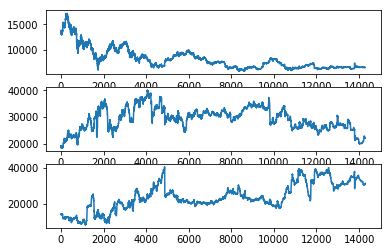

In [2]:
def search_by_ts(ts_list):
    df_b = pd.read_csv("bitfinex_BTCUSD_1499503811000_1540938106535.csv")
    df_b = df_b[["TS","price"]]
    df_b = df_b[df_b["TS"]>=ts_list[0]*1000]
    df_b = df_b[df_b["TS"]<=ts_list[-1]*1000]
    tt_list = df_b.TS.values.tolist()
    p_list = df_b.price.values.tolist()
    
    i = 0
    m = len(tt_list)-1
    price_list = []
    for ts in ts_list:
        while(tt_list[i]<ts*1000 and i<m):
            i=i+1
        price_list.append(round(p_list[i]))
    return price_list
import pandas as pd
df_l =pd.read_csv('BTCLONG_01.csv')
l_list = df_l.long.values.tolist()
df_s =pd.read_csv('BTCSHORT_01.csv')
s_list = df_s.short.values.tolist()
print(len(df_l))
print(len(df_s))
ts_list = df_l.TS.values.tolist()
price_list = search_by_ts(ts_list)
# df['price'] = price_list
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(3,1,1)
plt.plot(price_list)
plt.subplot(3,1,2)
plt.plot(l_list)
plt.subplot(3,1,3)
plt.plot(s_list)

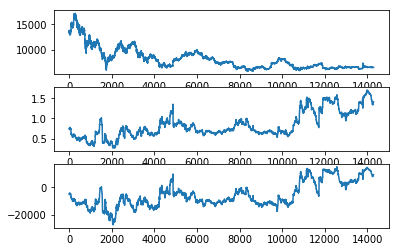

In [3]:
import pandas as pd
df_l =pd.read_csv('BTCLONG_01.csv')
l_list = df_l.long.values.tolist()
df_s =pd.read_csv('BTCSHORT_01.csv')
s_list = df_s.short.values.tolist()
c_list = df_s.s_c.values.tolist()
df_l['short'] = s_list
df_l['s_c'] = c_list
df_l['price'] = price_list
ratio_list = []
sum_list = []
sum2_list = []
for idx, s in enumerate(s_list):
    ratio_list.append(s/l_list[idx])
    sum_list.append(s-l_list[idx])
    sum2_list.append(l_list[idx]-s)
df_l['short/long'] = ratio_list
df_l['short-long'] = sum_list
df_l['long_short'] = sum2_list
# df_l.to_csv('BTCSHORTLONG_01.csv',index=False)
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(3,1,1)
plt.plot(price_list)
plt.subplot(3,1,2)
plt.plot(ratio_list)
plt.subplot(3,1,3)
plt.plot(sum_list)

In [5]:
import numpy
numpy.corrcoef(price_list, sum2_list)[0, 1]

0.4721649110299535

In [6]:
numpy.corrcoef(price_list, sum2_list)

array([[1.        , 0.47216491],
       [0.47216491, 1.        ]])

In [7]:
numpy.corrcoef(price_list, l_list)

array([[ 1.        , -0.29518169],
       [-0.29518169,  1.        ]])

In [8]:
numpy.corrcoef(price_list, s_list)

array([[ 1.        , -0.72050332],
       [-0.72050332,  1.        ]])

In [5]:
import numpy
numpy.corrcoef(price_list[:3000], l_list[:3000])

array([[ 1.        , -0.70442252],
       [-0.70442252,  1.        ]])

In [6]:
import numpy
numpy.corrcoef(price_list[:6000], l_list[:6000])

array([[ 1.        , -0.70512955],
       [-0.70512955,  1.        ]])

In [9]:
import numpy
numpy.corrcoef(price_list[:7000], l_list[:7000])

array([[ 1.        , -0.70665468],
       [-0.70665468,  1.        ]])

In [10]:
import numpy
numpy.corrcoef(price_list[7000:], l_list[7000:])

array([[1.        , 0.20049675],
       [0.20049675, 1.        ]])

In [11]:
import numpy
numpy.corrcoef(price_list[10000:], l_list[10000:])

array([[1.        , 0.35422299],
       [0.35422299, 1.        ]])

In [33]:
import numpy
import pandas as pd
df =pd.read_csv('BTCSHORTLONG_01.csv')
s_list = df.short.values.tolist()
price_list = df.price.values.tolist()
cor_list = []
n = 160
sell = 0.65
buy = -0.85
for i in range(n):
    cor_list.append(0)
sell_flag = False
sum = 0
for i in range(n,len(price_list)):
    c = numpy.corrcoef(price_list[i-n:i+1],s_list[i-n:i+1])[0, 1]
    if(c > sell):
        cor_list.append(c)
        if(not sell_flag):
            sell_flag = True
            sum = sum + price_list[i]
            print('sell in '+ str(price_list[i]))
    else:
        cor_list.append(0)
        if(sell_flag):
            if(c < buy):
                sell_flag = False
                sum = sum - price_list[i]
                print('buy in '+ str(price_list[i]))
if(sell_flag):
    sum = sum - price_list[i]
    print('buy in '+ str(price_list[i]))
print('profit in USD: '+ str(sum))

# %matplotlib inline
# import matplotlib.pyplot as plt
# plt.subplot(2,1,1)
# plt.plot(price_list)
# plt.subplot(2,1,2)
# plt.plot(cor_list)

sell in 15064
buy in 10264
sell in 11401
buy in 9936
sell in 8783
buy in 6485
sell in 7454
buy in 8073
sell in 9188
buy in 7433
sell in 6554
buy in 7392
sell in 8317
buy in 7676
sell in 7403
buy in 7063
sell in 6987
buy in 6406
sell in 6191
buy in 6252
sell in 6646
buy in 6489
sell in 6688
buy in 6294
profit in USD: 10913


In [25]:
import pandas as pd
from datetime import datetime
import time
def search_by_ts(ts_list):
    df_b = pd.read_csv("bitfinex_BTCUSD_1499503811000_1540938106535.csv")
    df_b = df_b[["TS","price"]]
    df_b = df_b[df_b["TS"]>=ts_list[0]*1000]
    df_b = df_b[df_b["TS"]<=ts_list[-1]*1000]
    tt_list = df_b.TS.values.tolist()
    p_list = df_b.price.values.tolist()
    
    i = 0
    m = len(tt_list)-1
    price_list = []
    for ts in ts_list:
        while(tt_list[i]<ts*1000 and i<m):
            i=i+1
        price_list.append(p_list[i])
    return price_list

def from_t_to_ts(t):
#     t = "2008-11-10 17:53:59"
#     format = "%Y-%m-%d  %H:%M:%S"
    format = "%Y-%m-%d  %H:%M"
    ts = time.mktime(datetime.strptime(t, format).timetuple())
    return int(ts)

def from_ts_to_t(ts):
    return datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M')

df =pd.read_csv('BTCSHORT.csv')
t_list = df.datetime.values.tolist()
o_list = df.open.values.tolist()
c_list = df.close.values.tolist()
ts_list = [from_t_to_ts(t) for t in t_list]
o_list = [round(o) for o in o_list]
c_list = [round(c) for c in c_list]

cols = ['TS', 'T', 'short', 's_c']
df = pd.DataFrame(columns=cols)
df['TS'] = ts_list
df['T'] = t_list
df['short'] = o_list
df['s_c'] = c_list
df = df.sort_values(by=['TS'])

for idx, ts in enumerate(ts_list[:-1]):
    if(ts+1800 not in ts_list):
        df = df.append({'TS':ts+1800, 'T':from_ts_to_t(ts+1800), 'short':c_list[idx], 's_c':0}, ignore_index=True)
df = df.sort_values(by=['TS'])

ts_list = df.TS.values.tolist()
price_list = search_by_ts(ts_list)
df['price'] = price_list
print(df)

               TS                 T  short    s_c         price
0      1514770200  2018-01-01 01:30  14183  14082  13610.000000
8579   1514772000  2018-01-01 02:00  14082      0  13280.000000
1      1514773800  2018-01-01 02:30  14050  14036  13260.000000
8580   1514775600  2018-01-01 03:00  14036      0  13363.000000
2      1514777400  2018-01-01 03:30  14020  13997  13552.000000
8581   1514779200  2018-01-01 04:00  13997      0  13393.000000
3      1514781000  2018-01-01 04:30  13961  13950  13437.000000
4      1514782800  2018-01-01 05:00  13944  13952  13584.000000
8582   1514784600  2018-01-01 05:30  13952      0  13546.000000
5      1514786400  2018-01-01 06:00  13954  13893  13511.000000
8583   1514788200  2018-01-01 06:30  13893      0  13667.000000
6      1514790000  2018-01-01 07:00  13875  13929  13780.000000
8584   1514791800  2018-01-01 07:30  13929      0  13770.000000
7      1514793600  2018-01-01 08:00  13963  13894  13616.000000
8      1514795400  2018-01-01 08:30  138

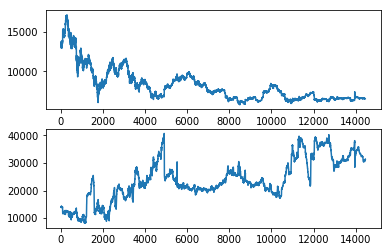

In [34]:
o_list = df.short.values.tolist()
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(price_list)
plt.subplot(2,1,2)
plt.plot(o_list)

In [35]:
import cv2
import os
def find_rectangle(file_path,save_path):
    file_path = str(file_path)
    save_path = str(save_path)
    img = cv2.imread(file_path)
    (_, t) = cv2.threshold(img[2:,:], 230,255, cv2.THRESH_BINARY)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,3))
    f= cv2.morphologyEx(t,cv2.MORPH_CLOSE,kernel)
    (_, q) = cv2.threshold(f, 0,255, cv2.THRESH_BINARY_INV)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(8,5))
    s= cv2.morphologyEx(q,cv2.MORPH_CLOSE,kernel)
    g = cv2.cvtColor(s, cv2.COLOR_BGR2GRAY)
    (_,contours,_) = cv2.findContours(g, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if_fail = True
    for contour in contours:
        (x,y,w,h) = cv2.boundingRect(contour)
        if(w<150 and w>80 and h>15 ):
            m = img[y+1:y+h,x+1:x+w-1]
            cv2.imwrite( save_path, m);
            if_fail = False
    if(if_fail):
        print('!!! fail in '+file_path)
        cv2.imwrite( save_path, cv2.imread(file_path));
def multi_processing(source_folder,target_folder):
    source_target_dirs = [[os.path.join(source_folder, f),os.path.join(target_folder, f)]
                          for f in os.listdir(source_folder) 
                          if os.path.isdir(os.path.join(source_folder, f))]
    if (os.path.exists(target_folder) and os.path.isdir(target_folder)):
        for d in source_target_dirs:
            if not os.path.exists(d[1]):
                os.makedirs(d[1])
            source_targert_files = [[os.path.join(d[0], f),os.path.join(d[1], f)] 
                                    for f in os.listdir(d[0])
                                    if os.path.isfile(os.path.join(d[0], f))]
            for f in source_targert_files:
                find_rectangle(f[0],f[1])
# multi_processing('/home/liu/Desktop/nodejs/images/BTCLONG','/home/liu/Desktop/nodejs/images/BTCLONG_target')
multi_processing('/home/liu/Desktop/nodejs/images/BTCSHORT_target3','/home/liu/Desktop/nodejs/images/BTCSHORT_target2')

In [36]:
import cv2
import os
from PIL import Image
import pytesseract
import pandas as pd
import re
def recognise_once(file_path):
    file_path = str(file_path)
    img = cv2.imread(file_path)
    height,width = img.shape[:2]
    img = cv2.resize(img,(2*width,2*height),interpolation=cv2.INTER_CUBIC)
    (_, thresh) = cv2.threshold(img, 110,255, cv2.THRESH_BINARY)
    (_, q) = cv2.threshold(thresh, 0,255, cv2.THRESH_BINARY_INV)
    code = pytesseract.image_to_string(q)
    return code
def multi_recognise(source_folder,target_name):
    df = pd.DataFrame(columns=['open','high','low','close','month','day','time'])
    source_dirs = [os.path.join(source_folder, f)
                          for f in os.listdir(source_folder) 
                          if os.path.isdir(os.path.join(source_folder, f))]
    for d in source_dirs:
        source_files = [[os.path.join(d, f),f]
                        for f in os.listdir(d)
                        if os.path.isfile(os.path.join(d, f))]
        for f in source_files:
            code = recognise_once(f[0])
            mystring=f[1].split('_')[1]
            o = mystring[ mystring.find("O")+1 : mystring.find("H") ]
            h = mystring[ mystring.find("H")+1 : mystring.find("L") ]
            l = mystring[ mystring.find("L")+1 : mystring.find("C") ]
            if(mystring.find("+")!=-1):
                c = mystring[ mystring.find("C")+1 : mystring.find("+") ]
            else:
                c = mystring[ mystring.find("C")+1 : mystring.find("−") ]
            try:
                t = re.search(r'\d{2}:\d{2}', code).group()
                d = re.search(r'\d{2}(.*)[A-Za-z]{3}', code).group()
                df = df.append({'open':o, 'high':h, 'low':l, 'close':c, 'month':d[-3:], 'day':d[:2], 'time':t}, ignore_index=True)
            except:
                print(f[0])
    df = df.sort_values(['month', 'day','time'])
    df.to_csv(target_name,index=False)
    
# multi_recognise('/home/liu/Desktop/nodejs/images/BTCLONG_target','BTCLONG.csv')
multi_recognise('/home/liu/Desktop/nodejs/images/BTCSHORT_target2','BTCSHORT2.csv')

/home/liu/Desktop/nodejs/images/BTCSHORT_target2/HOUR12/1398_O32596.7583H32625.2255L32587.6348C32591.836332591.8363−4.9219.png
/home/liu/Desktop/nodejs/images/BTCSHORT_target2/HOUR12/1392_O32453.7551H32497.7578L32453.7551C32497.757832497.7578+44.0027.png


In [8]:
def monthToNum(shortMonth):
    return{
            'Jan' : '01',
            'Feb' : '02',
            'Mar' : '03',
            'Apr' : '04',
            'May' : '05',
            'Jun' : '06',
            'Jul' : '07',
            'Aug' : '08',
            'Sep' : '09', 
            'Oct' : '10',
            'Nov' : '11',
            'Dec' : '12'
    }[shortMonth]
import pandas as pd
from datetime import datetime
import time

def from_t_to_ts(t):
    format = "%Y-%m-%d  %H:%M"
    ts = time.mktime(datetime.strptime(t, format).timetuple())
    return int(ts)

def from_ts_to_t(ts):
    return datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M')

df_l =pd.read_csv('BTCSHORT1.csv')
# g = df_l.groupby(['month'])
# g.size()
# g = df_l.groupby(['day'])
# g.size()
m_list = df_l["month"].values
m_list = [monthToNum(m) for m in m_list]
df_l["m"] = m_list
d_list = df_l["day"].values
d_list = [str(d).zfill(2) for d in d_list]
t_list = df_l["time"].values
datetime_list = []
for i in range(len(df_l)):
    datetime_list.append('2018-'+m_list[i]+'-'+d_list[i]+' '+t_list[i])
df_l['datetime'] = datetime_list
df_l = df_l.sort_values(['datetime'])

cc_list = df_l["close"].values
cc_list = [float(cc.split('C')[0]) for cc in cc_list]
df_l['close'] = cc_list
df_l = df_l.drop_duplicates()

t_list = df_l.datetime.values.tolist()
o_list = df_l.open.values.tolist()
c_list = df_l.close.values.tolist()
ts_list = [from_t_to_ts(t) for t in t_list]
o_list = [round(o) for o in o_list]
c_list = [round(c) for c in c_list]
cols = ['TS', 'T', 'short', 's_c']
df = pd.DataFrame(columns=cols)
df['TS'] = ts_list
df['T'] = t_list
df['short'] = o_list
df['s_c'] = c_list
df = df.sort_values(by=['TS'])
for idx, ts in enumerate(ts_list[:-1]):
    if(ts+1800 not in ts_list):
        if(from_ts_to_t(ts+1800)<t_list[idx]):
            df = df.append({'TS':ts+1800, 'T':from_ts_to_t(ts+5400), 'short':c_list[idx], 's_c':0}, ignore_index=True)
        else:
            df = df.append({'TS':ts+1800, 'T':from_ts_to_t(ts+1800), 'short':c_list[idx], 's_c':0}, ignore_index=True)
df = df.sort_values(by=['TS'])
df.to_csv('BTCshort_02.csv',index=False)

In [9]:
def monthToNum(shortMonth):
    return{
            'Jan' : '01',
            'Feb' : '02',
            'Mar' : '03',
            'Apr' : '04',
            'May' : '05',
            'Jun' : '06',
            'Jul' : '07',
            'Aug' : '08',
            'Sep' : '09', 
            'Oct' : '10',
            'Nov' : '11',
            'Dec' : '12'
    }[shortMonth]
import pandas as pd
from datetime import datetime
import time

def from_t_to_ts(t):
    format = "%Y-%m-%d  %H:%M"
    ts = time.mktime(datetime.strptime(t, format).timetuple())
    return int(ts)

def from_ts_to_t(ts):
    return datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M')

df_l =pd.read_csv('BTCSHORT2.csv')
# g = df_l.groupby(['month'])
# g.size()
# g = df_l.groupby(['day'])
# g.size()
m_list = df_l["month"].values
m_list = [monthToNum(m) for m in m_list]
df_l["m"] = m_list
d_list = df_l["day"].values
d_list = [str(d).zfill(2) for d in d_list]
t_list = df_l["time"].values
datetime_list = []
for i in range(len(df_l)):
    datetime_list.append('2018-'+m_list[i]+'-'+d_list[i]+' '+t_list[i])
df_l['datetime'] = datetime_list
df_l = df_l.sort_values(['datetime'])

cc_list = df_l["close"].values
cc_list = [int(cc.split('.')[0]) for cc in cc_list]
df_l['close'] = cc_list
df_l = df_l.drop_duplicates()

t_list = df_l.datetime.values.tolist()
o_list = df_l.open.values.tolist()
c_list = df_l.close.values.tolist()
ts_list = [from_t_to_ts(t) for t in t_list]
o_list = [round(o) for o in o_list]
c_list = [round(c) for c in c_list]
cols = ['TS', 'T', 'short', 's_c']
df = pd.DataFrame(columns=cols)
df['TS'] = ts_list
df['T'] = t_list
df['short'] = o_list
df['s_c'] = c_list
df = df.sort_values(by=['TS'])
for idx, ts in enumerate(ts_list[:-1]):
    if(ts+1800 not in ts_list):
        if(from_ts_to_t(ts+1800)<t_list[idx]):
            df = df.append({'TS':ts+1800, 'T':from_ts_to_t(ts+5400), 'short':c_list[idx], 's_c':0}, ignore_index=True)
        else:
            df = df.append({'TS':ts+1800, 'T':from_ts_to_t(ts+1800), 'short':c_list[idx], 's_c':0}, ignore_index=True)
df = df.sort_values(by=['TS'])
df.to_csv('BTCshort_03.csv',index=False)

In [14]:
import json
import pandas as pd
def monthToNum(shortMonth):
    return{
            'Jan' : '01',
            'Feb' : '02',
            'Mar' : '03',
            'Apr' : '04',
            'May' : '05',
            'Jun' : '06',
            'Jul' : '07',
            'Aug' : '08',
            'Sep' : '09', 
            'Oct' : '10',
            'Nov' : '11',
            'Dec' : '12'
    }[shortMonth]

with open('btc2.json') as json_data:
    btc = json.load(json_data)

time_list = []
price_list = []
for s in btc:
    price = round(float(s.split(' ')[0].split(':')[1]))
    time = s.split('  ')[-1]
    day = s.split('  ')[0].split(':')[-1]
    m = day.split(' ')[0]
    month = monthToNum(m)
    if(len(day.split(' ')[1])==1):
        day = '2018-'+month+'-0'+day.split(' ')[1]
    else:
        day = '2018-'+month+'-'+day.split(' ')[1]
#     print(day+' '+time)
    time_list.append(day+' '+time)
    price_list.append(price)
cols = ['T', 'price']
df = pd.DataFrame(columns=cols)
df['T'] = time_list
df['price'] = price_list
df = df.sort_values(by=['T'])
df.to_csv('BTC_price.csv',index=False)